In [ ]:
pip install tensorflow==2.5


In [ ]:
pip install keras==2.5


In [8]:
pip install cv2

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [ ]:
pip install opencv-python

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
import keras

In [2]:
from matplotlib import pyplot

In [3]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [4]:

#DATASET_SIZE = 70000
TRAIN_RATIO = 0.7
VALIDATION_RATIO = 0.2
TEST_RATIO = 0.1

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

X = np.concatenate([x_train, x_test])
y = np.concatenate([y_train, y_test])

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=(1-TRAIN_RATIO))
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=((TEST_RATIO/(VALIDATION_RATIO+TEST_RATIO))))

In [6]:
x_train = np.array(X_train)
y_train = np.array(y_train)

x_val = np.array(X_val)
y_val = np.array(y_val)

x_test = np.array(X_test)
y_test = np.array(y_test)

In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)
print("---")
print(x_train[0].shape)


(41999, 32, 32, 3)
(41999, 1)
(12000, 32, 32, 3)
(12000, 1)
(6001, 32, 32, 3)
(6001, 1)
---
(32, 32, 3)


Note: you may need to restart the kernel to use updated packages.


In [8]:
import cv2

In [9]:
x_train[1].max()

250

In [10]:
x_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_train])
x_val = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_val])
x_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_test])

In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)
print("---")
print(x_train[0].shape)


(41999, 32, 32)
(41999, 1)
(12000, 32, 32)
(12000, 1)
(6001, 32, 32)
(6001, 1)
---
(32, 32)


In [12]:
x_train[1].max()

221

In [13]:
img_width, img_height = 32,32

In [14]:
num_classes = 10

In [15]:
x_train = x_train.reshape(-1, img_width, img_height, 1)
x_test = x_test.reshape(-1, img_width, img_height, 1)
x_val = x_val.reshape(-1, img_width, img_height, 1)

x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_val = x_val.astype("float32")

x_train = (x_train / 255.0) 
x_test = (x_test / 255.0)
x_val = (x_val / 255.0)


y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
y_val = np_utils.to_categorical(y_val, num_classes)

In [16]:
x_train[0].max()

0.98039216

In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)
print("---")
print(x_train[0].shape)


(41999, 32, 32, 1)
(41999, 10)
(12000, 32, 32, 1)
(12000, 10)
(6001, 32, 32, 1)
(6001, 10)
---
(32, 32, 1)


In [19]:
pwd

'C:\\Users\\fjdurlop\\Desktop'

In [19]:
loading = False

In [20]:
if (not loading):
    save_dir = "D:/data/cifar/x_train.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, x_train)

    save_dir = "D:/data/cifar/y_train.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, y_train)

    save_dir = "D:/data/cifar/x_test.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, x_test)
    save_dir = "D:/data/cifar/y_test.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, y_test)

    save_dir = "D:/data/cifar/x_val.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, x_val)

    save_dir = "D:/data/cifar/y_val.npy"
    with open(save_dir, 'wb') as f:
        np.save(f, y_val)

In [42]:

model_1 = keras.models.Sequential([
                                 keras.layers.Conv2D(32, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu'), 
                                 keras.layers.MaxPooling2D(pool_size= (2, 2)),
                                 keras.layers.Conv2D(64, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu'), 
                                 keras.layers.MaxPooling2D(pool_size= (2, 2)), 
                                 keras.layers.Conv2D(128, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu'),
                                 keras.layers.MaxPooling2D(pool_size= (2, 2)),
                                 keras.layers.Dropout(0.25),
                                 keras.layers.Conv2D(128, kernel_size= (3, 3), padding= 'same', 
                                                     activation= 'relu'), 
                                 keras.layers.MaxPooling2D(pool_size= (2, 2)),
                                 keras.layers.Dropout(0.25),

                                 keras.layers.Flatten(),
                                 keras.layers.Dropout(0.3), 
                                
                                 keras.layers.Dense(512, activation= 'relu'), 
                                 keras.layers.Dropout(0.3), 
                                
                                 keras.layers.Dense(100, activation= 'relu'),
 
                                 keras.layers.Dense(num_classes, activation = 'softmax')])



In [43]:
model_1.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy']) #change adam

In [44]:
history = model_1.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=64,
    shuffle=True,
    validation_data=(x_val, y_val),
)

Epoch 1/20
657/657 [==============================] - 198s 162ms/step - loss: 2.0568 - accuracy: 0.2300 - val_loss: 1.5280 - val_accuracy: 0.4293
Epoch 2/20
657/657 [==============================] - 98s 150ms/step - loss: 1.5170 - accuracy: 0.4491 - val_loss: 1.3414 - val_accuracy: 0.5134
Epoch 3/20
657/657 [==============================] - 101s 153ms/step - loss: 1.2875 - accuracy: 0.5448 - val_loss: 1.1896 - val_accuracy: 0.5624
Epoch 4/20
657/657 [==============================] - 101s 153ms/step - loss: 1.1607 - accuracy: 0.5927 - val_loss: 1.0892 - val_accuracy: 0.6151
Epoch 5/20
657/657 [==============================] - 101s 153ms/step - loss: 1.0596 - accuracy: 0.6265 - val_loss: 1.1080 - val_accuracy: 0.6113
Epoch 6/20
657/657 [==============================] - 101s 154ms/step - loss: 0.9931 - accuracy: 0.6534 - val_loss: 1.2318 - val_accuracy: 0.5888
Epoch 7/20
657/657 [==============================] - 101s 154ms/step - loss: 0.9476 - accuracy: 0.6710 - val_loss: 1.7528 - 

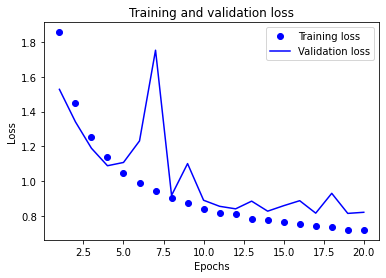

In [45]:
# plotting training and validation loss
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

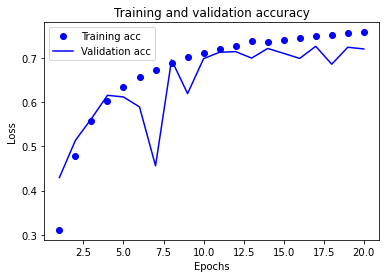

In [46]:
# Plotting training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [47]:
pwd

'C:\\Users\\fjdurlop\\Desktop'

In [48]:
model_1.save("C:/Users/fjdurlop/Desktop/model_01")


INFO:tensorflow:Assets written to: C:/Users/fjdurlop/Desktop/model_01\assets


In [49]:
results = model_1.evaluate(x_test,y_test)

188/188 [==============================] - 6s 30ms/step - loss: 0.8080 - accuracy: 0.7299


In [ ]:

model_2 = keras.models.Sequential([
                                 keras.layers.Conv2D(16, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu'), 
                                 #keras.layers.MaxPooling2D(pool_size= (2, 2)),
                                 keras.layers.Conv2D(32, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu'), 
                                 keras.layers.MaxPooling2D(pool_size= (2, 2)),
                                 keras.layers.Conv2D(64, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu'), 
                                 #keras.layers.MaxPooling2D(pool_size= (2, 2)), 
                                 keras.layers.Conv2D(64, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu'),
                                 keras.layers.MaxPooling2D(pool_size= (2, 2)),
                                 keras.layers.Dropout(0.25),
                                 keras.layers.Conv2D(128, kernel_size= (3, 3), padding= 'same', 
                                                     activation= 'relu'), 
                                 keras.layers.MaxPooling2D(pool_size= (2, 2)),
                                 keras.layers.Dropout(0.25),

                                 keras.layers.Flatten(),
                                 keras.layers.Dropout(0.3), 
                                
                                 keras.layers.Dense(256, activation= 'relu'), 
                                 keras.layers.Dropout(0.3), 
                                
                                 keras.layers.Dense(64, activation= 'relu'),
 
                                 keras.layers.Dense(num_classes, activation = 'softmax')])

model_2.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy']) #change adam

: 

In [73]:
history = model_2.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=64,
    shuffle=True,
    validation_data=(x_val, y_val),
)

Epoch 1/20
657/657 [==============================] - 120s 174ms/step - loss: 2.0300 - accuracy: 0.2436 - val_loss: 1.5482 - val_accuracy: 0.4342
Epoch 2/20
657/657 [==============================] - 111s 169ms/step - loss: 1.4666 - accuracy: 0.4740 - val_loss: 1.3555 - val_accuracy: 0.5230
Epoch 3/20
657/657 [==============================] - 119s 181ms/step - loss: 1.2116 - accuracy: 0.5756 - val_loss: 1.0954 - val_accuracy: 0.6042
Epoch 4/20
657/657 [==============================] - 118s 180ms/step - loss: 1.0487 - accuracy: 0.6404 - val_loss: 0.9516 - val_accuracy: 0.6736
Epoch 5/20
657/657 [==============================] - 118s 179ms/step - loss: 0.9475 - accuracy: 0.6714 - val_loss: 0.8376 - val_accuracy: 0.7052
Epoch 6/20
657/657 [==============================] - 123s 188ms/step - loss: 0.8747 - accuracy: 0.7002 - val_loss: 1.0793 - val_accuracy: 0.6332
Epoch 7/20
657/657 [==============================] - 122s 186ms/step - loss: 0.8328 - accuracy: 0.7151 - val_loss: 0.8191 -

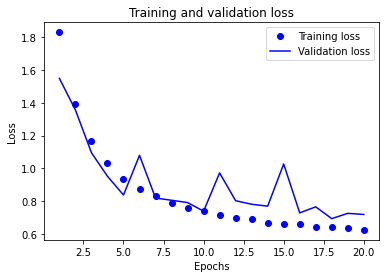

In [74]:
# plotting training and validation loss
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

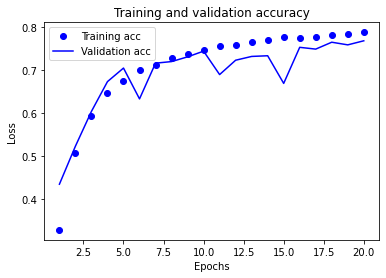

In [75]:
# Plotting training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [76]:
model_2.evaluate(x_test,y_test)

188/188 [==============================] - 4s 23ms/step - loss: 0.6805 - accuracy: 0.7809


[0.6804701685905457, 0.7808698415756226]

In [77]:
model_2.save("C:/Users/fjdurlop/Desktop/model_02")


INFO:tensorflow:Assets written to: C:/Users/fjdurlop/Desktop/model_02\assets
